In [1]:
import pandas as pd
import json
import re
import tifffile as tiff
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from tqdm import tqdm

In [2]:
with tiff.TiffFile('4-2.tif') as tif:
    frames = tif.asarray()


In [3]:
fTest = np.copy(frames)

In [4]:
print(frames.shape)

(100, 1100, 2000, 3)


In [6]:
import numpy as np

def basicFrameSub(frames, fBase, thresh):
    lastFrame = fBase[0]  # Initialize lastFrame with the first frame of the background model
    res = [lastFrame]

    for i in range(1, len(frames)):
        f = frames[i]

        # Calculate the absolute difference between the current frame and the last frame
        diff = f - lastFrame

        # Calculate the magnitude of color differences for each pixel
        diff_magnitude = np.sum(diff ** 2, axis=-1)
        plt.imshow(diff_magnitude)
        plt.colorbar()
        plt.show()

        # Create a binary mask where pixel differences are above the threshold
        mask = diff_magnitude > thresh
        vals = np.zeros((f.shape[0], f.shape[1]))
        vals[mask] = 255

        res.append(vals)
        lastFrame = fBase[i]

    return res


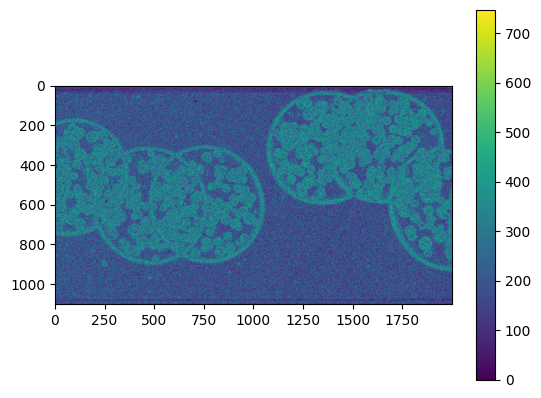

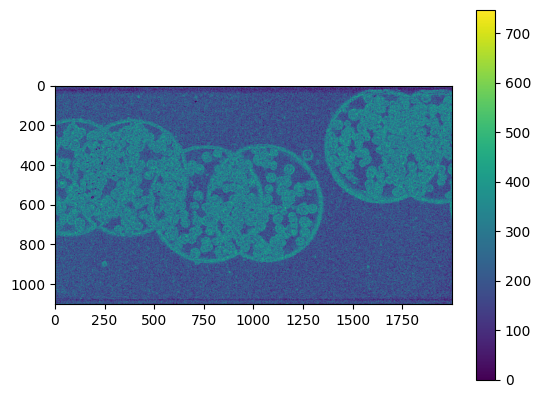

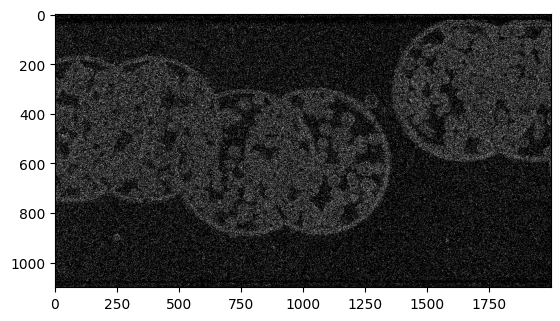

In [7]:
f2 = basicFrameSub(fTest[2:5], frames[2:5], 550)

## passe très vite a rien :(

plt.imshow(f2[2], cmap = 'gray')

In [8]:
print(f2[0].shape)

(1100, 2000, 3)


In [9]:
image_pil = Image.fromarray(np.uint8(f2[1]))

# Display the PIL Image
image_pil.show()

In [13]:
class background_sub():
    def __init__(self, frames, params):
        self.frames = frames

        self.alpha = params[0]          # exponential filter

        self.threshold = params[1]      # threshold comparison

        self.initFrameId = 0           # id of the first frame

        self.binMaps = []               # list of binary maps
        
    def _initBg(self, frames):
        # just take the first frame as reference
        # self.initFrameId += 1
        # self.binMaps.append(self.frames[0])

        #initVal = np.mean(frames[0], axis = 1)

        m = np.nanmean(frames[0], axis = 1)

        repeated_vector = np.round(np.tile(m[:, np.newaxis, :], (1, 2000, 1))).astype(int)
        

        return repeated_vector

    def _updateBg(self, prevBg, frame, alpha):
        # exponential filter
        return (alpha * prevBg + (1-alpha) * frame)
    
    def _compareFrames(self, frame, bg, threshold):
        # compare frames

        d = np.sum((frame - bg) ** 2, axis = -1)

        plt.imshow(d)
        plt.colorbar()
        plt.show()

        bMap = (d >= threshold)
        return bMap


    def _loop(self):

        bg = self._initBg(self.frames)

        for i in tqdm(range(self.initFrameId, len(self.frames))):
            bMap = self._compareFrames(self.frames[i], bg, self.threshold)
            
            self.binMaps.append(bMap)

            bg = self._updateBg(bg, self.frames[i], self.alpha)

            bg = np.round(bg).astype(int)
        return self.binMaps
    


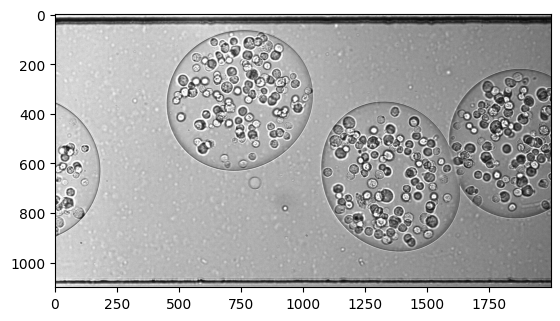

(1100, 2000, 3)
[[168.106 168.106 168.106]
 [168.325 168.325 168.325]
 [170.964 170.964 170.964]
 [175.713 175.713 175.713]]



26
228


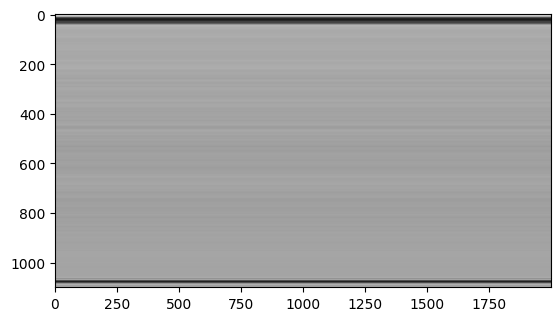

In [12]:
plt.imshow(frames[0], cmap = 'gray')
plt.show()
print(frames[0].shape)

m = np.nanmean(frames[0], axis = 1)

print(m[:4, :])
print('\n\n')
repeated_vector = np.round(np.tile(m[:, np.newaxis, :], (1, 2000, 1))).astype(int)

print(np.min(repeated_vector))
print(np.max(repeated_vector))
plt.imshow(repeated_vector, cmap = 'gray')
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

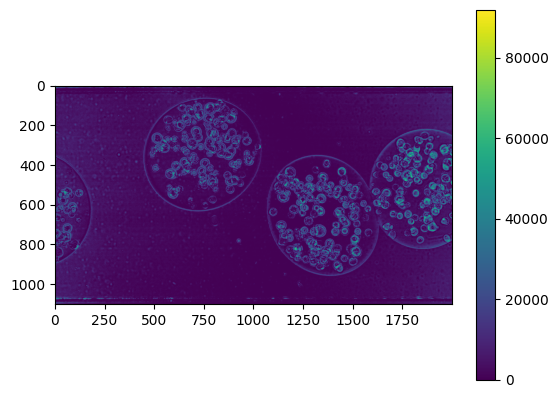

 20%|██        | 1/5 [00:00<00:02,  1.52it/s]

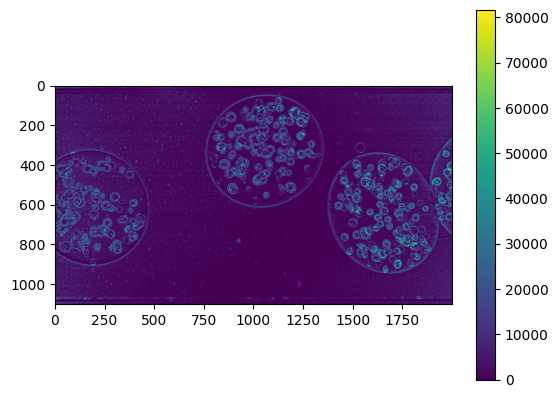

 40%|████      | 2/5 [00:01<00:01,  1.72it/s]

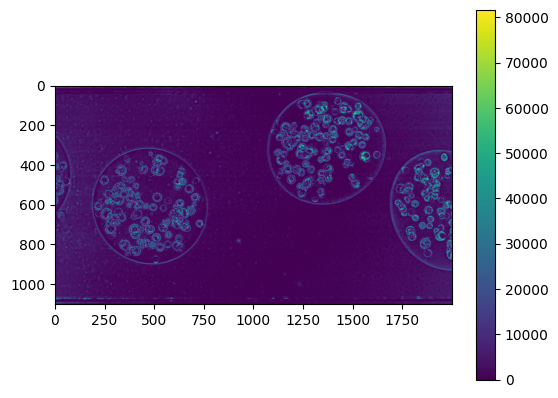

 60%|██████    | 3/5 [00:01<00:01,  1.84it/s]

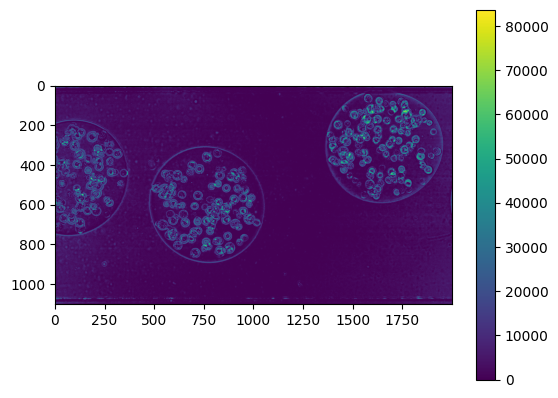

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

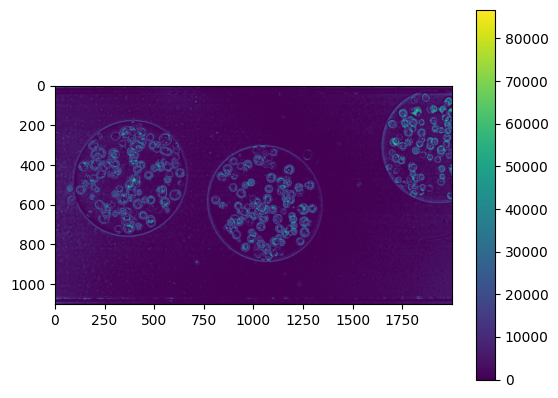

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


In [14]:
bgS = background_sub(frames[:5], [0.95, 10000])

bMap = bgS._loop()

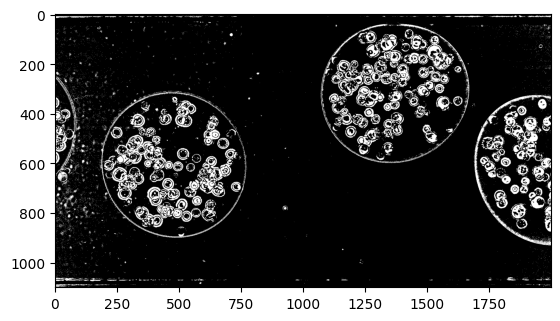

In [23]:
plt.imshow(bMap[2], cmap='gray')        # basis 

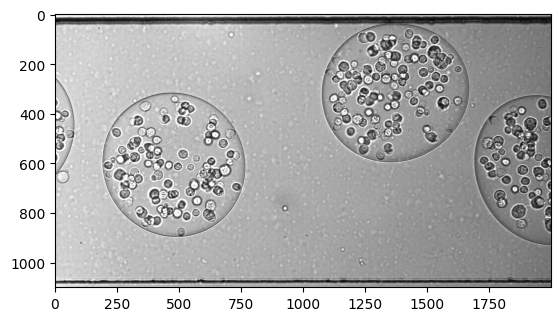

In [15]:
plt.imshow(frames[2])

In [77]:
image_pil = Image.fromarray(np.uint8(bMap[2]))

# Display the PIL Image
image_pil.show()

In [67]:
class background_sub():
    def __init__(self, frames, params):
        self.frames = frames

        self.alpha = params[0]          # exponential filter

        self.threshold = params[1]      # threshold comparison

        self.initFrameId = 0           # id of the first frame

        self.binMaps = []               # list of binary maps
        
    def _initBg(self, frames):
        # just take the first frame as reference
        self.initFrameId += 1
        self.binMaps.append(self.frames[0])
        return frames[0]

    def _updateBg(self, prevBg, frame, alpha):
        # exponential filter
        return (alpha * prevBg + (1-alpha) * frame)
    
    def _compareFrames(self, frame, bg, threshold):
        # compare frames

        d = np.sum((frame - bg) ** 2, axis = -1)

        bMap = (d >= threshold)
        return bMap


    def _loop(self):

        bg = self._initBg(self.frames)

        for i in tqdm(range(self.initFrameId, len(self.frames))):
            bMap = self._compareFrames(self.frames[i], bg, self.threshold)
            
            self.binMaps.append(bMap)

            bg = self._updateBg(bg, self.frames[i], self.alpha)

            bg = np.round(bg).astype(int)
        return self.binMaps
    


False
